# Credit Card Fraud Detection

Objective
Predict whether a transaction is fraudulent based on features such as amount, category, customer age/gender/income, etc. The target variable is:

Fraud = 1 → fraudulent

Fraud = 0 → legitimate


Data Dictionary

Column Name	Description

TransactionID-	Unique ID for each transaction (integer)

TransactionAmount-	Amount in USD (float)

TransactionTime-	Time in hours since the first transaction (float)

MerchantCategory-	Merchant category (categorical: 'Retail', 'Online', 'Restaurant', 'Travel')

CustomerAge-	Age of customer (integer: 18–80)

CustomerGender-	Gender (categorical: 'Male', 'Female')

CustomerIncome-	Income in USD (integer: 20,000–200,000)

TransactionLocation-	Location of transaction (categorical: 'Urban', 'Suburban', 'Rural')

PreviousFraudCount-	Past 6-month fraud count (integer: 0–5)

Fraud-	Target variable (binary: 1 = fraud, 0 = not fraud)



In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [153]:
df = pd.read_csv('credit_card_data.csv')


In [4]:
df

,TransactionID,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount,Fraud
0,204,899.06,19.53,Online,73,Male,97475,Urban,0,1
1,267,698.53,9.41,Online,64,Female,181779,Rural,5,1
2,153,149.17,10.18,Restaurant,24,Male,67638,Urban,3,1
3,10,709.53,6.50,Retail,32,Male,180701,Urban,3,0
4,234,495.06,13.33,Travel,25,Female,72930,Rural,1,1
...,...,...,...,...,...,...,...,...,...,...
295,189,532.00,22.81,Restaurant,71,Female,196611,Suburban,3,1
296,72,202.72,0.44,Online,55,Female,193946,Suburban,4,0
297,107,413.33,9.34,Travel,26,Female,53742,Rural,5,1
298,271,810.31,12.34,Retail,50,Female,156727,Suburban,4,1


# Essential Exploritory Data Analysis (EDA)

In [5]:
df.describe()

,TransactionID,TransactionAmount,TransactionTime,CustomerAge,CustomerIncome,PreviousFraudCount,Fraud
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,497.728367,12.260100,49.466667,113662.533333,2.540000,0.703333
std,86.746758,292.868780,7.261983,18.055161,51746.345767,1.702369,0.457552
min,1.000000,10.040000,0.260000,18.000000,20526.000000,0.000000,0.000000
25%,75.750000,242.882500,5.995000,35.000000,68614.750000,1.000000,0.000000
50%,150.500000,514.160000,12.520000,49.000000,109308.500000,3.000000,1.000000
75%,225.250000,758.072500,18.562500,66.000000,159984.250000,4.000000,1.000000
max,300.000000,990.100000,23.990000,80.000000,199917.000000,5.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        300 non-null    int64  
 1   TransactionAmount    300 non-null    float64
 2   TransactionTime      300 non-null    float64
 3   MerchantCategory     300 non-null    object 
 4   CustomerAge          300 non-null    int64  
 5   CustomerGender       300 non-null    object 
 6   CustomerIncome       300 non-null    int64  
 7   TransactionLocation  300 non-null    object 
 8   PreviousFraudCount   300 non-null    int64  
 9   Fraud                300 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 23.6+ KB


In [7]:
df.isnull().sum()

TransactionID          0
TransactionAmount      0
TransactionTime        0
MerchantCategory       0
CustomerAge            0
CustomerGender         0
CustomerIncome         0
TransactionLocation    0
PreviousFraudCount     0
Fraud                  0
dtype: int64

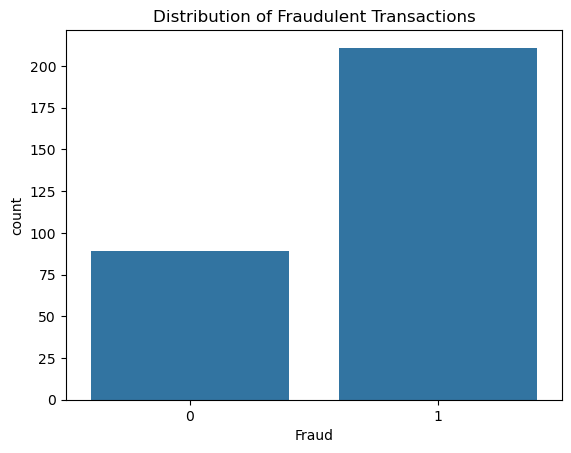

In [8]:
# Distribution of target variable
sns.countplot(x='Fraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

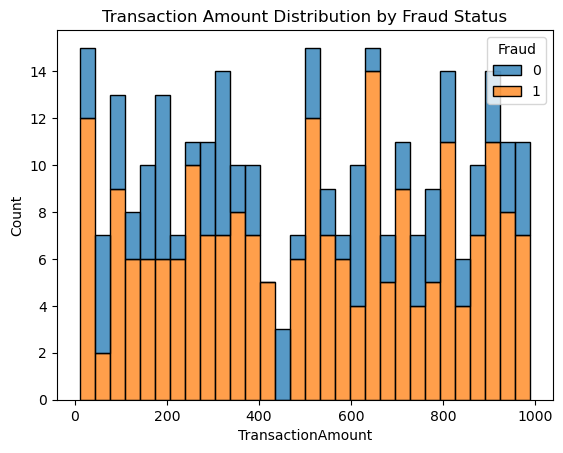

In [9]:
# Distribution of Transaction Amount by Fraud status
sns.histplot(data=df, x='TransactionAmount', hue='Fraud', multiple='stack', bins=30)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()


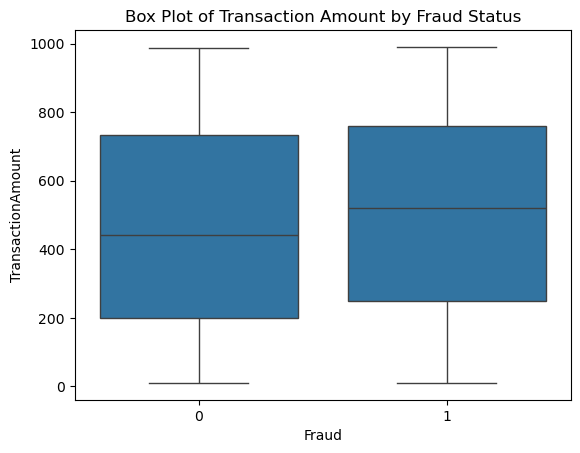

In [10]:
# Box plot for Transaction Amount by Fraud status
sns.boxplot(x='Fraud', y='TransactionAmount', data=df)
plt.title('Box Plot of Transaction Amount by Fraud Status')
plt.show()


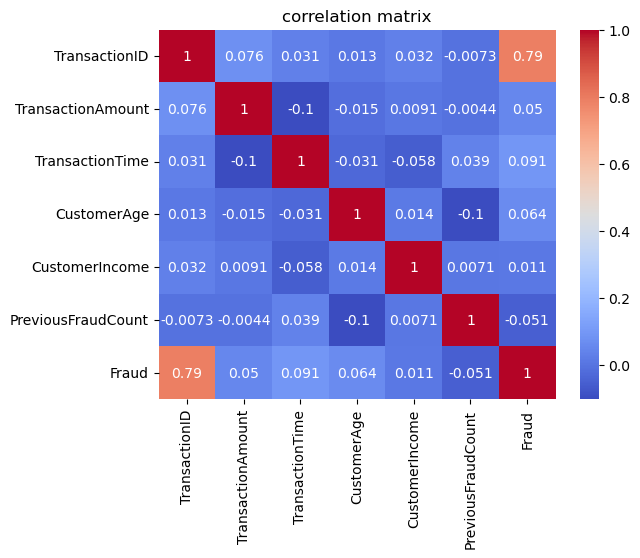

In [11]:
# Correlation matrix
num_cols = list()

for column in df.columns:
    if df[column].dtype != object:
        num_cols.append(column)
 
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

# Data Processing with Logistic Regression

In [12]:
# Encode categorical variables
label_encoders = {}

for column in ['MerchantCategory', 'CustomerGender', 'TransactionLocation']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [13]:
# Features and target
X = df.drop(['TransactionID', 'Fraud'], axis=1)  # Feature set (drop ID and target)
y = df['Fraud']  # Target variable


In [14]:
X.head()

,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount
0,899.06,19.53,0,73,1,97475,2,0
1,698.53,9.41,0,64,0,181779,0,5
2,149.17,10.18,1,24,1,67638,2,3
3,709.53,6.50,2,32,1,180701,2,3
4,495.06,13.33,3,25,0,72930,0,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [55]:
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

In [56]:
print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 55.56

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.50      0.38        24
           1       0.76      0.58      0.66        66

    accuracy                           0.56        90
   macro avg       0.53      0.54      0.52        90
weighted avg       0.64      0.56      0.58        90



Logistic Regression Confusion Matrix


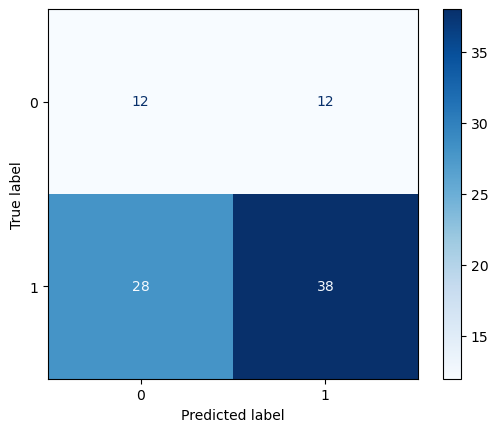

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, logreg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
print("Logistic Regression Confusion Matrix")

# Data Processing with Random Forest

In [75]:
# Import the model
from sklearn.ensemble import RandomForestClassifier
# Step 1: Apply SMOTE to training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

In [76]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


In [77]:
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

In [78]:
# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

rf_accuracy = accuracy_score(y_test, rf_pred)

In [79]:
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 65.56%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.21      0.24        24
           1       0.74      0.82      0.78        66

    accuracy                           0.66        90
   macro avg       0.52      0.51      0.51        90
weighted avg       0.62      0.66      0.63        90



Random Forest Confusion Matrix


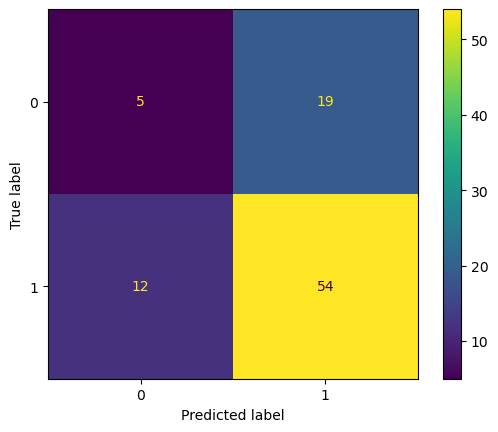

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="viridis")
print("Random Forest Confusion Matrix")

# Data Processing with K-Nearest Neighbors (KNN)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


In [82]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f'KNN Accuracy: {knn_accuracy*100:.2f}')
print('\nKNN Classification Report:')
print(classification_report(y_test, knn_pred))


KNN Accuracy: 61.11

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.08      0.10        24
           1       0.71      0.80      0.75        66

    accuracy                           0.61        90
   macro avg       0.42      0.44      0.43        90
weighted avg       0.55      0.61      0.58        90



KNN Confusion Matrix


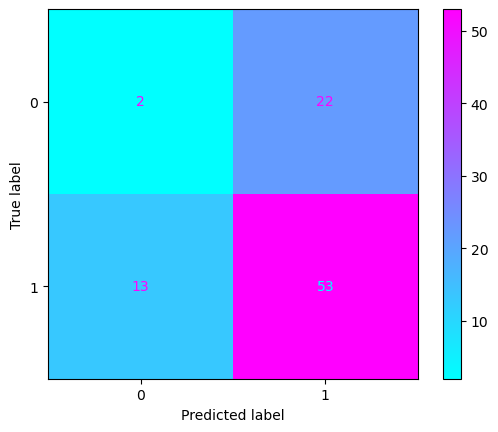

In [88]:
# Confusion Matrix
cm = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cool')  # Optional: adds color
print("KNN Confusion Matrix")

# Plot Model Comparison: Logistic Regression vs K-Nearest Neighbors (KNN)

In [117]:
models = ['Logistic Regression', 'KNN']
accuracies = [logreg_accuracy * 100, knn_accuracy * 100]


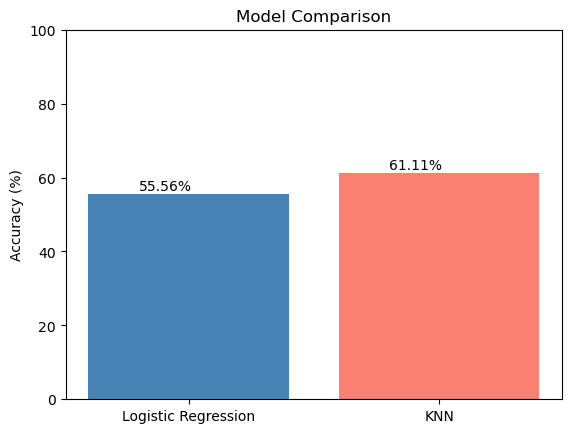

In [85]:
# Save the bars to a variable
bars = plt.bar(models, accuracies, color=['steelblue', 'salmon'])
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')

# Add accuracy labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0 - 0.2, yval + 1, f'{yval:.2f}%')

plt.ylim(0, 100)  # Optional: makes chart cleaner
plt.show()

# Plot Model Comparison: K-Nearest Neighbors (KNN) vs Random Forest

In [116]:
# Accuracy scores (you can also use F1-scores if preferred)
models = ['KNN', 'Random Forest']
accuracy_scores = [knn_accuracy * 100, rf_accuracy * 100]

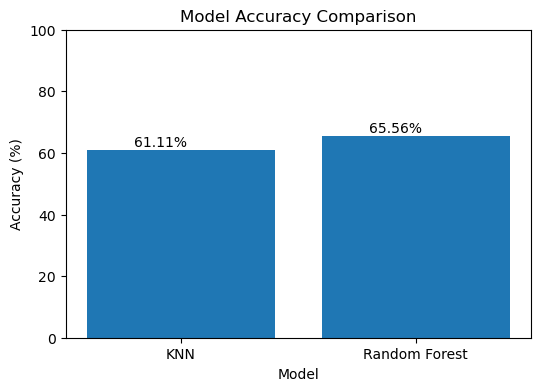

In [114]:
# Bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracy_scores)
plt.ylim(0, 100)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0 - 0.2, yval + 1, f'{yval:.2f}%')

plt.show()

## Data Processing with Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier


In [105]:
decision_tree = DecisionTreeClassifier(class_weight='balanced', max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)

In [106]:
print(f"Decision Tree Accuracy: {decision_tree_accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, decision_tree_pred))


Decision Tree Accuracy: 58.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.25      0.24        24
           1       0.72      0.71      0.72        66

    accuracy                           0.59        90
   macro avg       0.48      0.48      0.48        90
weighted avg       0.59      0.59      0.59        90



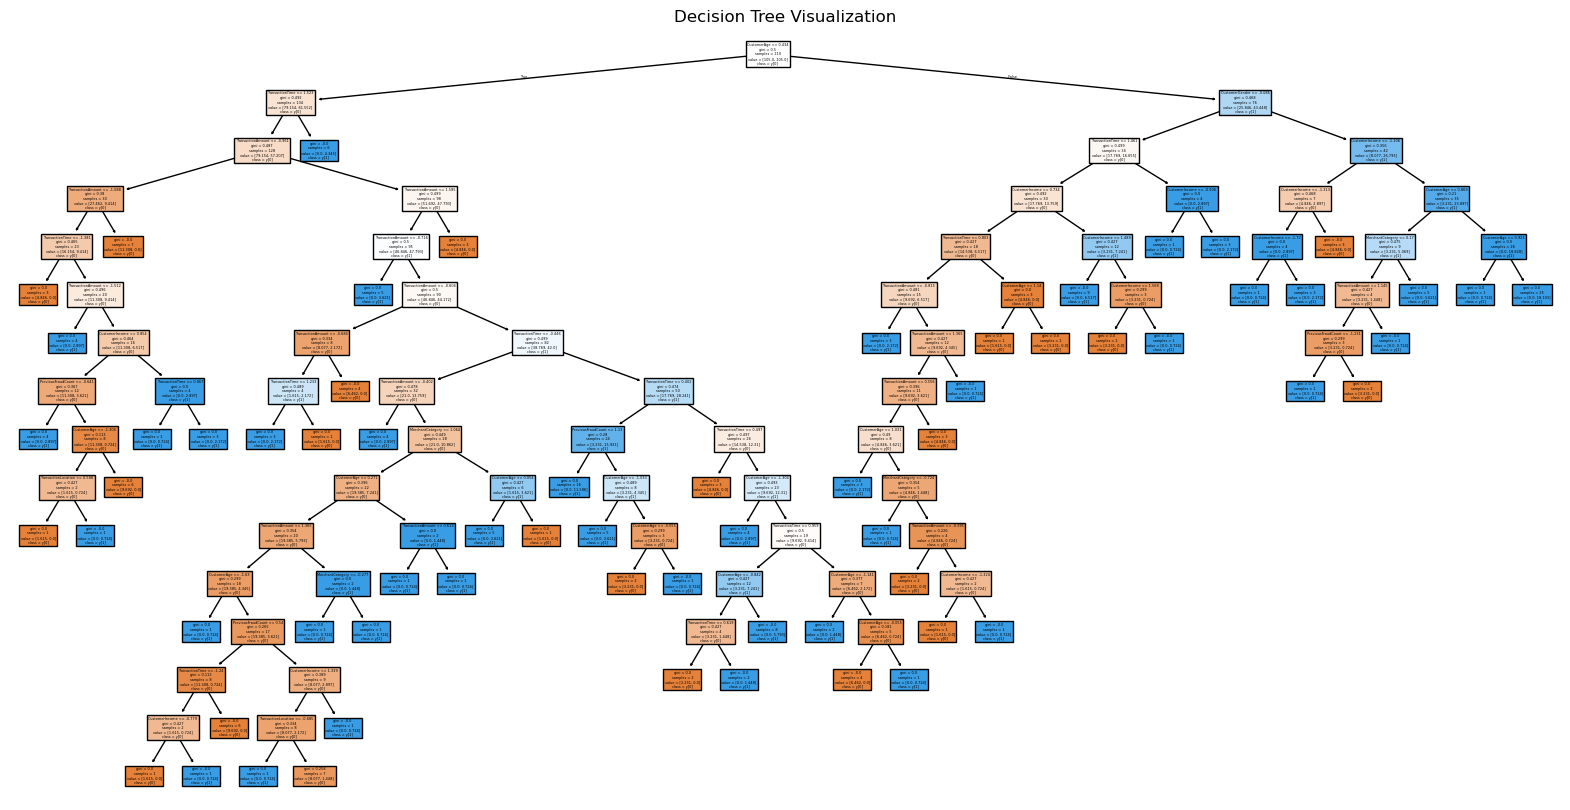

In [107]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=True)
plt.title("Decision Tree Visualization")
plt.show()


Decision Tree Classifier


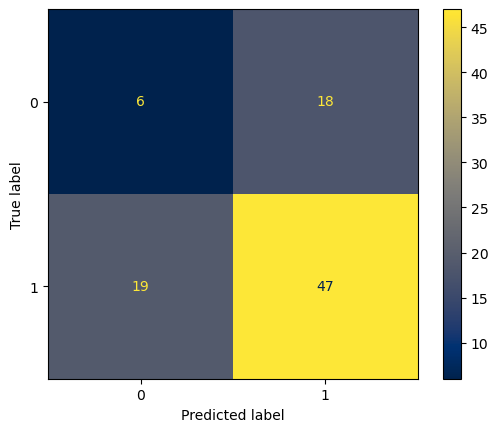

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, decision_tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="cividis")
print("Decision Tree Classifier")

# Plot Model Comparison: Random Forest vs Decision Tree Classifier

In [119]:
models = ['Decision Tree', 'Random Forest']
accuracy_scores = [decision_tree_accuracy * 100, rf_accuracy * 100]


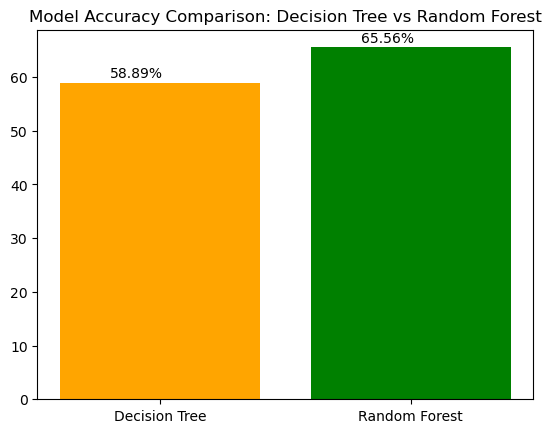

In [121]:
plt.title('Model Accuracy Comparison: Decision Tree vs Random Forest')
bars = plt.bar(models, accuracy_scores, color=['orange', 'green'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0 - 0.2, yval + 1, f'{yval:.2f}%')

plt.show()

## Data Processing with Support Vector Machine

In [128]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

svm = SVC()
svm.fit(X_train_res, y_train_res)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)


In [129]:
print(f'Support Vector Machine Accuracy: {svm_accuracy*100:.2f}')
print('\nSupport Vector Machine Classification Report:')
print(classification_report(y_test, svm_pred, zero_division=0))

Support Vector Machine Accuracy: 58.89

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.29      0.27        24
           1       0.73      0.70      0.71        66

    accuracy                           0.59        90
   macro avg       0.49      0.49      0.49        90
weighted avg       0.60      0.59      0.60        90



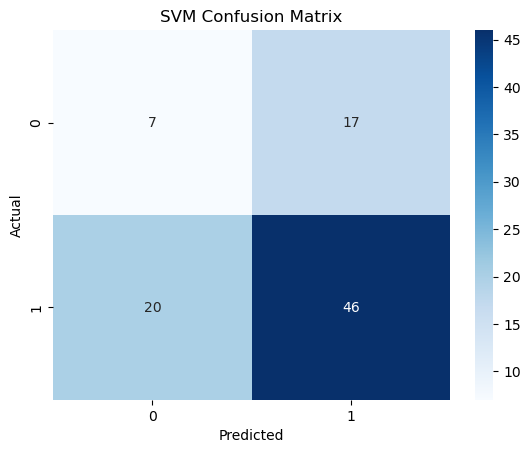

In [133]:
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## F1-Score Comparison: All the models 

In [147]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVM (with SMOTE)']
y_preds = [logreg_pred, knn_pred, rf_pred, decision_tree_pred, svm_pred]


In [148]:
f1_class_0 = []
f1_class_1 = []

# Collect F1-scores from classification reports
for pred in y_preds:
    report = classification_report(y_test, pred, output_dict=True, zero_division=0)
    f1_class_0.append(report['0']['f1-score'])
    f1_class_1.append(report['1']['f1-score'])


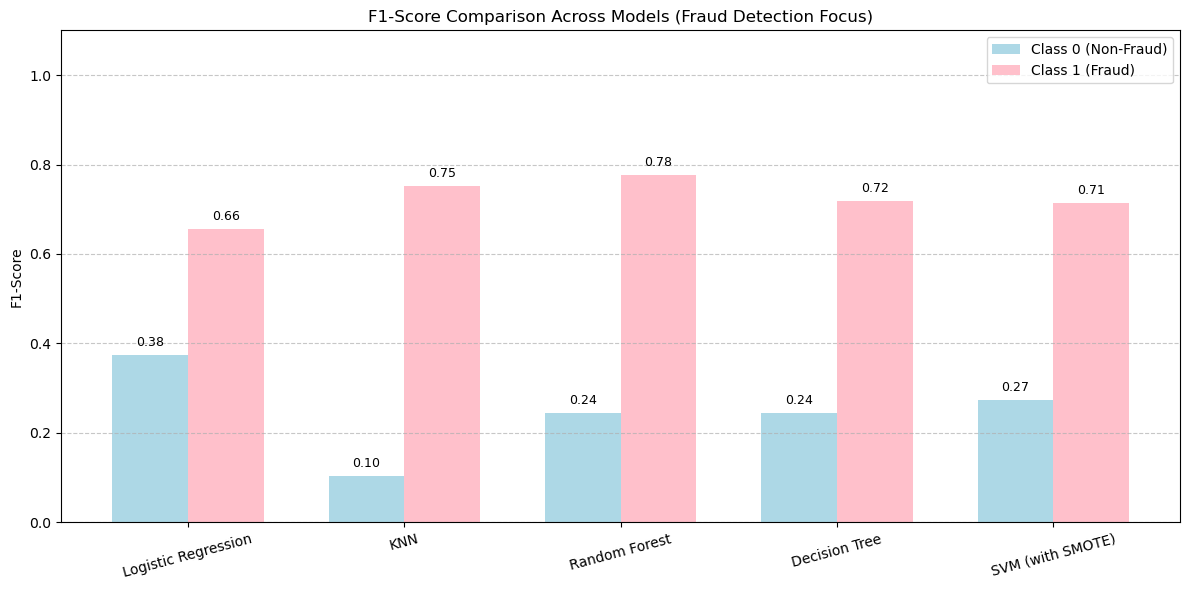

In [149]:
x = range(len(models))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - width/2 for i in x], f1_class_0, width=width, label='Class 0 (Non-Fraud)', color='lightblue')
plt.bar([i + width/2 for i in x], f1_class_1, width=width, label='Class 1 (Fraud)', color='pink')
for i in range(len(models)):
    plt.text(i - width/2, f1_class_0[i] + 0.02, f"{f1_class_0[i]:.2f}", ha='center', fontsize=9)
    plt.text(i + width/2, f1_class_1[i] + 0.02, f"{f1_class_1[i]:.2f}", ha='center', fontsize=9)

plt.xticks(x, models, rotation=15)
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison Across Models (Fraud Detection Focus)')
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Accuracy Comparison: All the models

In [144]:
# Summary of accuracies
model_accuracies = {
    'Logistic Regression': logreg_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Random Forest': rf_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'SVM (with SMOTE)': svm_accuracy
}

# Display accuracies
print("Model Accuracy Comparison:\n")
for model, accuracy in model_accuracies.items():
    print(f'{model}: {accuracy * 100:.2f}%')


Model Accuracy Comparison:

Logistic Regression: 55.56%
K-Nearest Neighbors: 61.11%
Random Forest: 65.56%
Decision Tree: 58.89%
SVM (with SMOTE): 58.89%


### 📌 Final Conclusion

After comparing multiple classification models on the credit card fraud detection dataset, the following conclusions can be drawn:

- **Random Forest** achieved the best F1-score for detecting fraud (Class 1) at **0.78**, indicating strong performance in correctly identifying fraudulent transactions.
- **K-Nearest Neighbors (KNN)** also performed well for Class 1 with an F1-score of **0.75**, but struggled with Class 0.
- **Logistic Regression**, **Decision Tree**, and **SVM (with SMOTE)** showed relatively balanced but lower performance.
- Across all models, performance on **Class 0 (Non-Fraud)** was significantly lower — this is expected due to **class imbalance** in fraud detection problems.
- **SMOTE** improved the SVM model’s ability to detect fraud, but it still did not outperform Random Forest.
  
### ✅ Why Random Forest Worked Best

- Random Forest combines multiple decision trees, which helps **reduce overfitting** and improves generalization.
- It naturally handles **imbalanced data** better by aggregating predictions.
- It’s **non-linear** and works well with **complex relationships** in the dataset.

Overall, Random Forest provides the **most reliable and consistent performance** in this use case, making it the preferred choice for real-world fraud detection systems.
